In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#import visualkeras
from PIL import ImageFont
from collections import Counter


In [3]:
#global seed
seed(42)
tf.random.set_seed(42)

## Data preprocessing

In [4]:
xtrain = np.load('/content/Xtrain_Classification2.npy')
ytrain = np.load('/content/ytrain_Classification2.npy')

xtest = np.load('/content/Xtest_Classification2.npy')

In [5]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

(10629, 2352)
(10629,)
(2658, 2352)


In [6]:
# normalize
xtrainn, xtestn = xtrain / 255.0, xtest / 255.0


In [7]:
# train test split

xtrainv, xtestv, ytrainv, ytestv = train_test_split(xtrainn, ytrain, test_size = 0.1, shuffle = True, random_state=42)

In [8]:
y0 = ytrain[ytrain==0]
y0 = len(y0)


y1 = ytrain[ytrain==1]
y1 = len(y1)

y2 = ytrain[ytrain==2]
y2 = len(y2)

y3 = ytrain[ytrain==3]
y3 = len(y3)

y4 = ytrain[ytrain==4]
y4 = len(y4)

y5 = ytrain[ytrain==5]
y5 = len(y5)

print(y0/len(ytrain)*100)
print(y1/len(ytrain)*100)
print(y2/len(ytrain)*100)
print(y3/len(ytrain)*100)
print(y4/len(ytrain)*100)
print(y5/len(ytrain)*100)

50.44689058236899
8.373318280176875
1.0913538432590084
21.685953523379435
9.314140558848434
9.08834321196726


In [9]:
number_counts = Counter(ytestv)
print(number_counts)
print(562/len(ytestv)*100)
print(77/len(ytestv)*100)
print(14/len(ytestv)*100)
print(223/len(ytestv)*100)
print(91/len(ytestv)*100)
print(96/len(ytestv)*100)



Counter({0.0: 562, 3.0: 223, 5.0: 96, 4.0: 91, 1.0: 77, 2.0: 14})
52.869238005644405
7.243650047036689
1.317027281279398
20.978363123236125
8.560677328316087
9.0310442144873


In [10]:
print(xtrainv.shape)

(9566, 2352)


In [11]:
# balance classes

smote = SMOTE(k_neighbors=5,sampling_strategy='not majority')
xtrainb, ytrainb = smote.fit_resample(xtrainv,ytrainv)

print(xtrainb.shape)
print(ytrainb.shape)

y0b = ytrainb[ytrainb==0]
y0b = len(y0b)
print(y0b)


y1b = ytrainb[ytrainb==1]
y1b = len(y1b)
print(y1b)

y2b = ytrainb[ytrainb==2]
y2b = len(y2b)

y3b = ytrainb[ytrainb==3]
y3b = len(y3b)

y4b = ytrainb[ytrainb==4]
y4b = len(y4b)

y5b = ytrainb[ytrainb==5]
y5b = len(y5b)

print(y0b/len(ytrainb)*100)
print(y1b/len(ytrainb)*100)
print(y2b/len(ytrainb)*100)
print(y3b/len(ytrainb)*100)
print(y4b/len(ytrainb)*100)
print(y5b/len(ytrainb)*100)

(28800, 2352)
(28800,)
4800
4800
16.666666666666664
16.666666666666664
16.666666666666664
16.666666666666664
16.666666666666664
16.666666666666664


In [12]:
# reshape the data

xtrainvr = np.reshape(xtrainb, (xtrainb.shape[0],28,28,3))
xtestvr = np.reshape(xtestv, (xtestv.shape[0],28,28,3))

xtestr = np.reshape(xtestn, (xtestn.shape[0],28,28,3))

## Data Viz

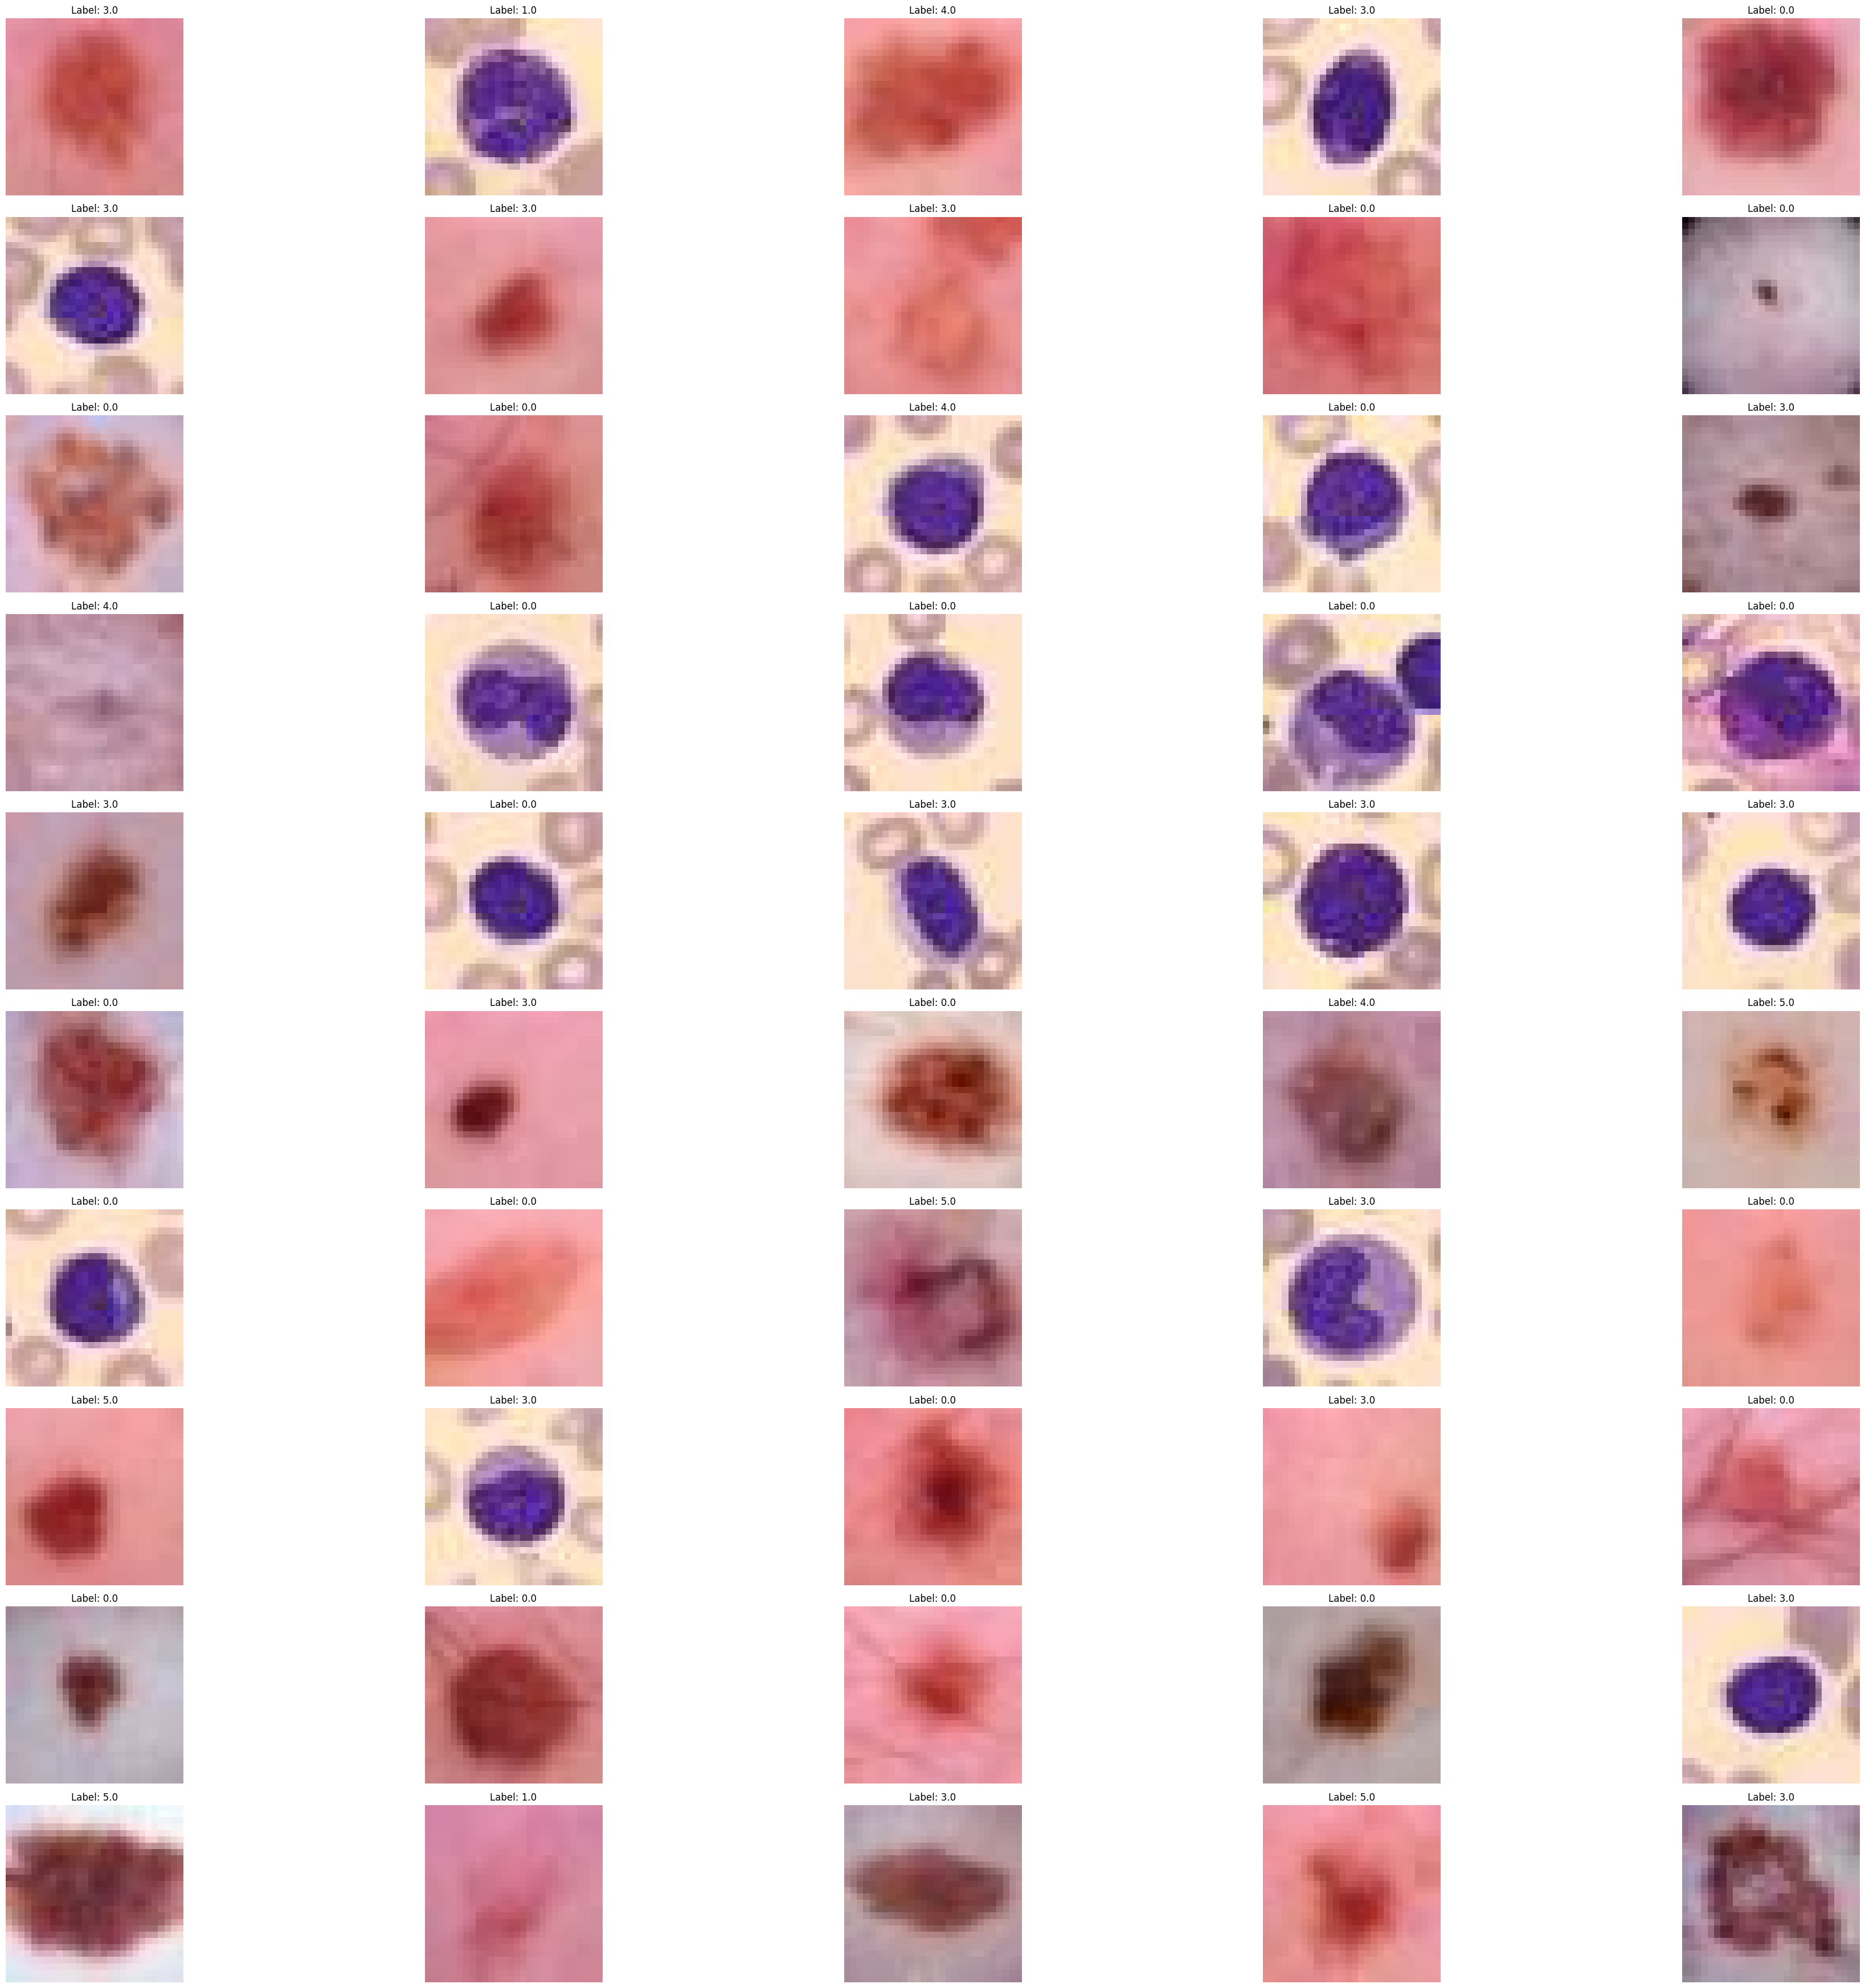

In [13]:
# visualize the data

num_images = 50
index = np.random.choice(len(xtrainvr), 50, replace=False)

fig, axes = plt.subplots(10, 5, figsize=(40, 35))

for i, ax in enumerate(axes.flat):
    if i < len(xtrain):
        ax.imshow(xtrainvr[i])
        ax.set_title(f"Label: {ytrain[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


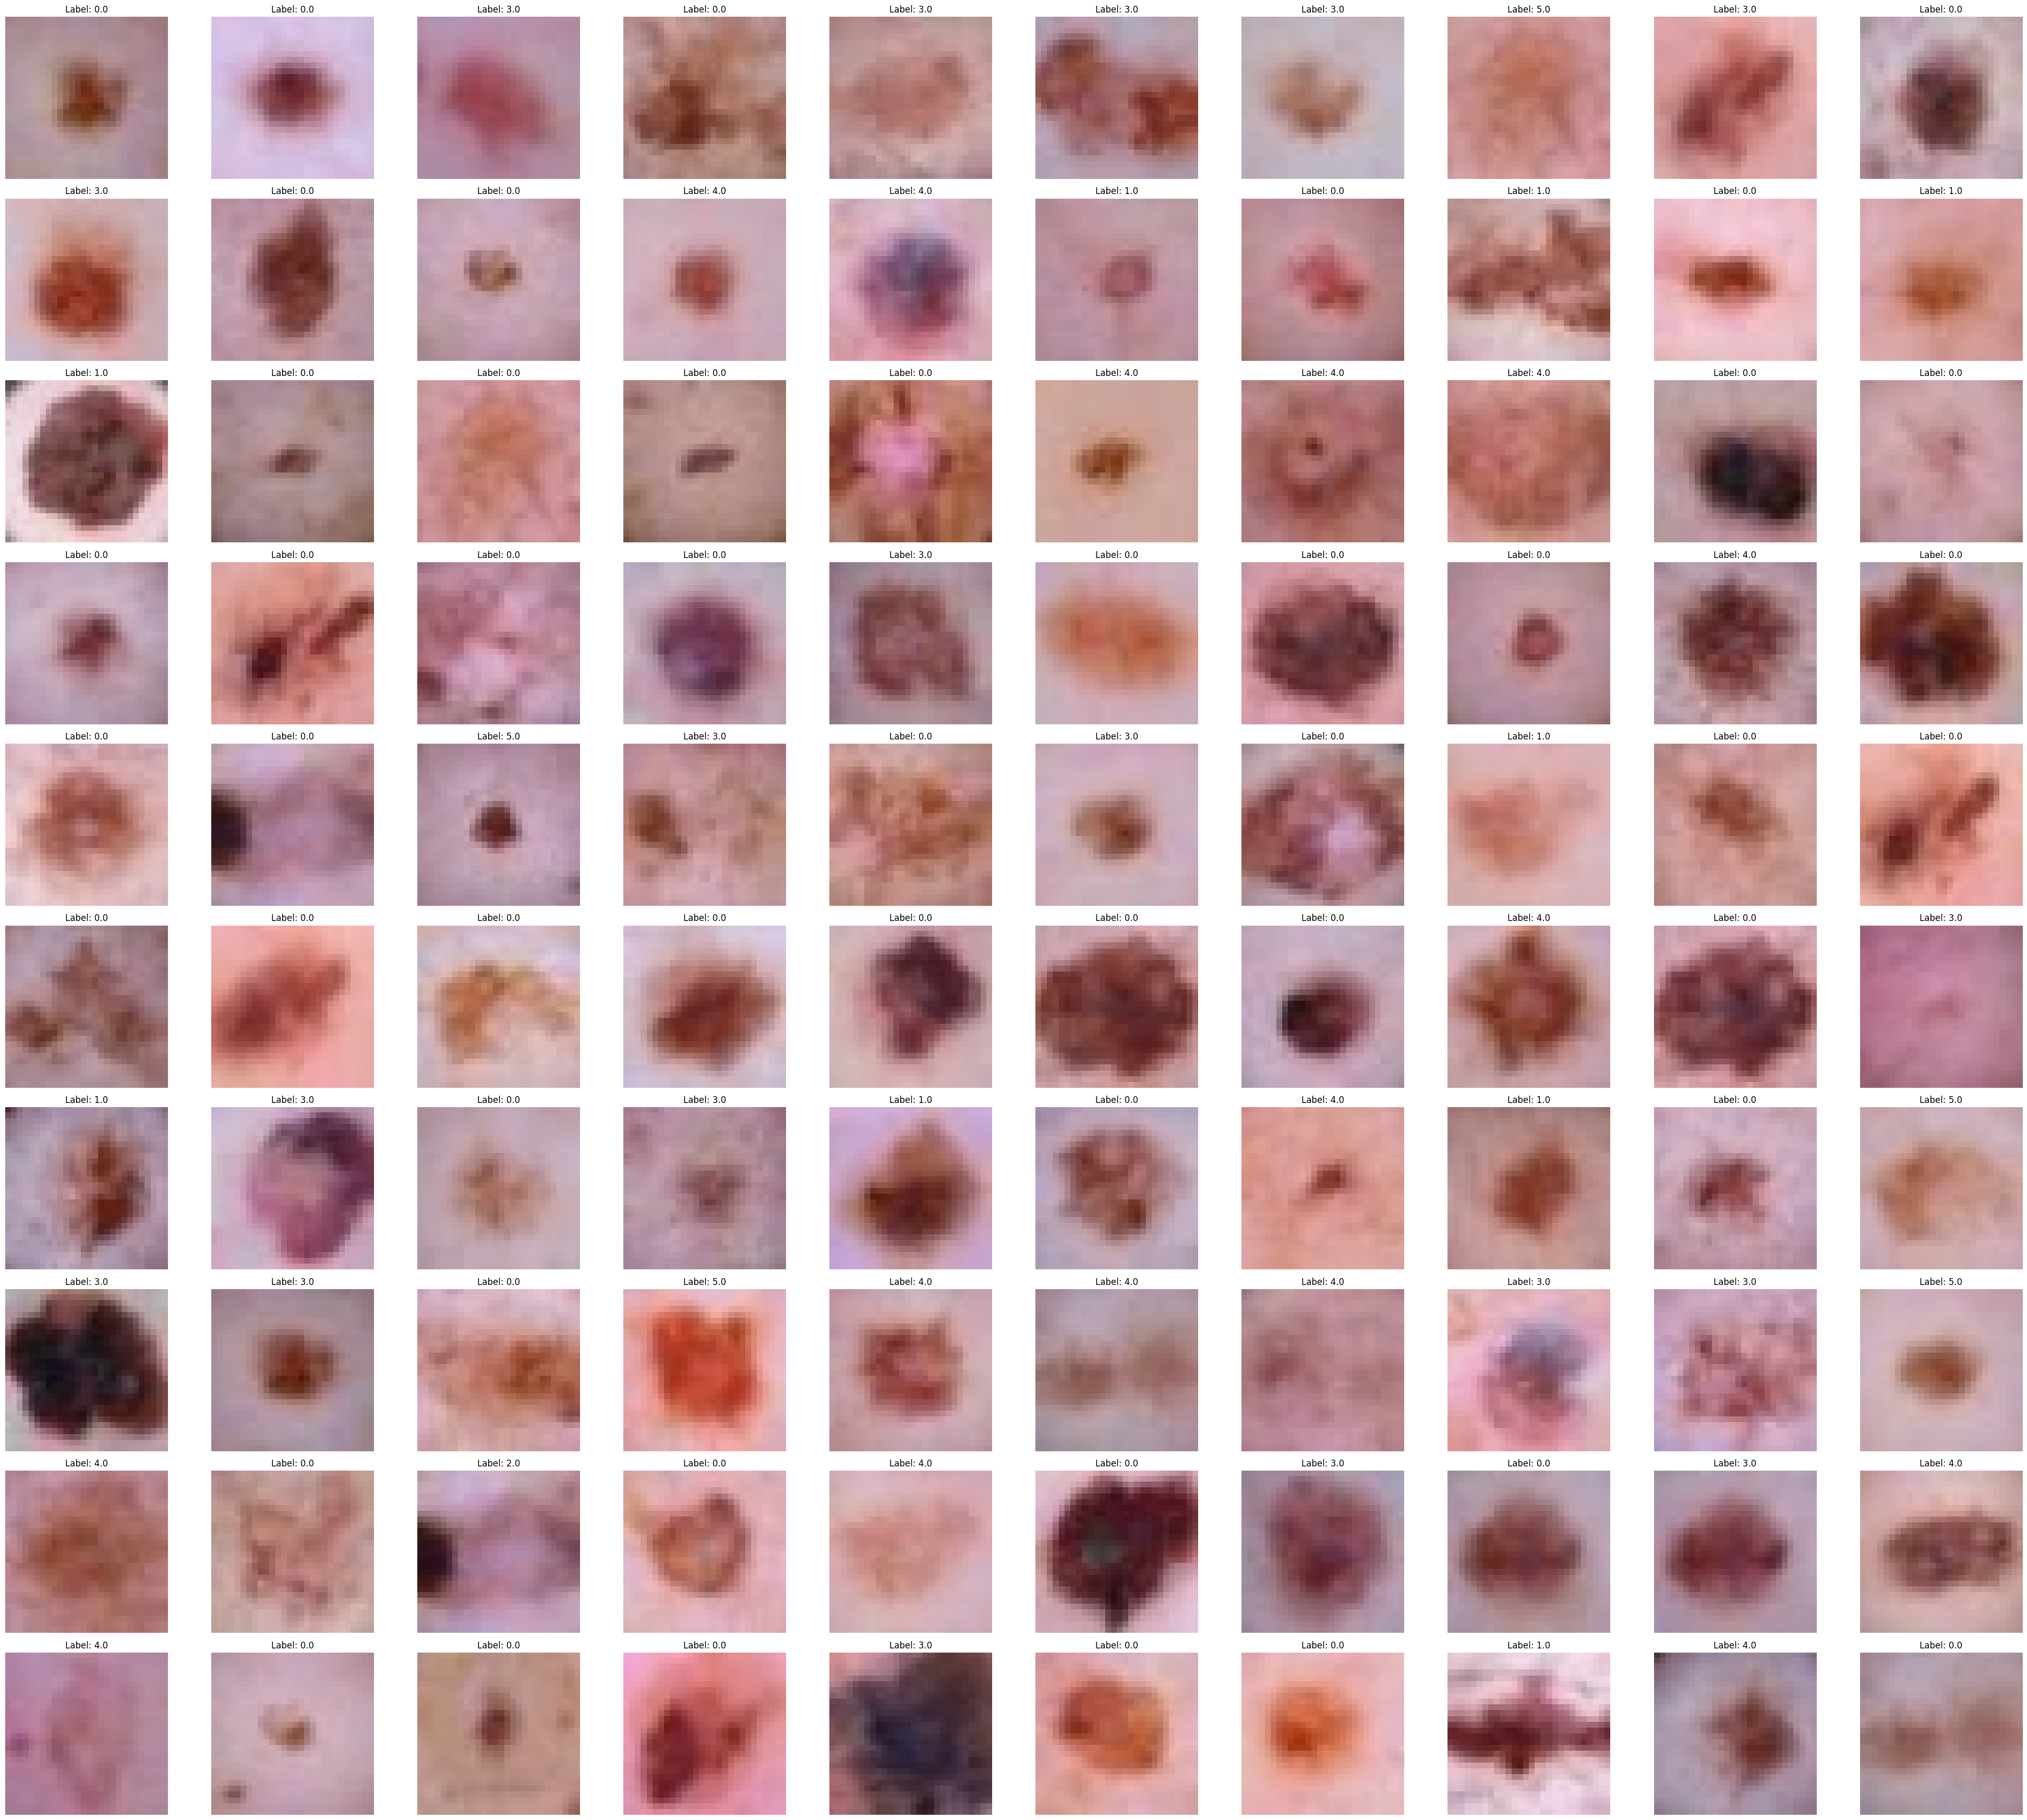

In [14]:
# # visualize the data

synth = xtrainvr[9566:]
synthy = ytrain[9566:]

num_images = 100
index = np.random.choice(len(synth), 50, replace=False)

fig, axes = plt.subplots(10, 10, figsize=(40, 35))

for i, ax in enumerate(axes.flat):
    if i < len(synth):
        ax.imshow(synth[i])
        ax.set_title(f"Label: {synthy[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

## Using Sklearn Classifiers

In [15]:
# #using NB

# gnb = GaussianNB()
# y_pred = gnb.fit(xtrainb, ytrainb).predict(xtestv)
# ba_nb = balanced_accuracy_score(ytestv,y_pred)
# print(ba_nb)

In [16]:
# # SVM
# clf = svm.SVC()
# clf.fit(xtrainb, ytrainb)
# y_pred = clf.predict(xtestv)
# ba_svm = balanced_accuracy_score(ytestv,y_pred)
# print(ba_svm)

In [17]:
# # MLPClassifier
# clf = MLPClassifier(max_iter=300).fit(xtrainb, ytrainb)
# y_pred = clf.predict(xtestv)
# ba_mlp = balanced_accuracy_score(ytestv,y_pred)
# print(ba_mlp)

## Use the model from task 3 and check BA

In [18]:
ytrainvc = tf.keras.utils.to_categorical(ytrainb, 6)
ytestvc = tf.keras.utils.to_categorical(ytestv, 6)

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [20]:
modelaug = Sequential()
modelaug.add(data_augmentation)
modelaug.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
modelaug.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug.add(layers.Dropout(0.2))
modelaug.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
modelaug.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug.add(layers.Dropout(0.2))
modelaug.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
modelaug.add(layers.MaxPooling2D((2, 2),padding='same'))
modelaug.add(layers.Dropout(0.4))

In [21]:
modelaug.add(layers.Flatten())
modelaug.add(layers.Dense(128, activation='relu'))
modelaug.add(layers.Dense(6, activation='softmax')) #changed to softmax due to multiclass

In [22]:
print(xtrainvr.shape)
print(xtestvr.shape)

(28800, 28, 28, 3)
(1063, 28, 28, 3)


In [23]:
print(ytrainv)

[0. 4. 0. ... 4. 5. 3.]


In [24]:
modelaug.reset_metrics()
modelaug.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights=True)

historyaug = modelaug.fit(xtrainvr, ytrainvc, epochs=120, callbacks=[stop],
                          validation_data=(xtestvr,ytestvc))

Epoch 1/120
900/900 [==============================] - 19s 7ms/step - loss: 1.2634 - accuracy: 0.4348 - true_positives: 4965.0000 - true_negatives: 141236.0000 - false_negatives: 23835.0000 - false_positives: 2764.0000 - val_loss: 0.7489 - val_accuracy: 0.6585 - val_true_positives: 565.0000 - val_true_negatives: 5138.0000 - val_false_negatives: 498.0000 - val_false_positives: 177.0000
Epoch 2/120
900/900 [==============================] - 5s 6ms/step - loss: 0.7682 - accuracy: 0.6409 - true_positives: 15331.0000 - true_negatives: 137415.0000 - false_negatives: 13469.0000 - false_positives: 6585.0000 - val_loss: 0.7201 - val_accuracy: 0.6030 - val_true_positives: 603.0000 - val_true_negatives: 5003.0000 - val_false_negatives: 460.0000 - val_false_positives: 312.0000
Epoch 3/120
900/900 [==============================] - 6s 7ms/step - loss: 0.6561 - accuracy: 0.6933 - true_positives: 18120.0000 - true_negatives: 137484.0000 - false_negatives: 10680.0000 - false_positives: 6516.0000 - val

In [25]:
# acc = historyaug.history['accuracy']
# val_acc = historyaug.history['val_accuracy']

# loss = historyaug.history['loss']
# val_loss = historyaug.history['val_loss']

# epochs_range = range(100)

# plt.figure(figsize=(8, 5))
# plt.subplot(1, 2, 1)
# plt.yticks(np.arange(0, 1, 0.1))
# plt.ylim(0,1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.yticks(np.arange(0, 1, 0.1))
# plt.ylim(0,1)
# plt.title('Training and Validation Loss')
# plt.show()

In [26]:
print(ytrainv.shape)
print()

(9566,)



In [27]:
ypred = modelaug.predict(xtestvr)
#print(ypred)

ypredlabels = [np.argmax(i) for i in ypred]
#print(ypredlabels)

from collections import Counter

# Count the occurrences of each number
number_counts = Counter(ypredlabels)

# Print the counts
for number, count in number_counts.items():
    print(f"Number {number} occurs {count} times.")


ba = balanced_accuracy_score(ytestv,ypredlabels)
print(ba)



34/34 [==============================] - 0s 2ms/step
Number 1 occurs 226 times.
Number 4 occurs 110 times.
Number 0 occurs 406 times.
Number 5 occurs 93 times.
Number 3 occurs 207 times.
Number 2 occurs 21 times.
0.885486104481714


In [28]:
confmat = confusion_matrix(ytestv,ypredlabels)

recall_per_class = np.diag(confmat) / np.sum(confmat, axis=1)
print(recall_per_class)

print((recall_per_class[0]+recall_per_class[1])/2)

[0.70996441 0.8961039  0.85714286 0.92376682 0.97802198 0.94791667]
0.803034154457642


## Model that predicts dataset labels

In [29]:
# dataset labels

ytrainlabels=[]
for i in range(len(ytrainb)):
  if ytrainb[i] in [0,1,2]:
    ytrainlabels.append(0)
  else:
    ytrainlabels.append(1)


ytestlabels =[]
for i in range(len(ytestv)):
  if ytestv[i] in [0,1,2]:
    ytestlabels.append(0)
  else:
    ytestlabels.append(1)


In [30]:
print(xtrainvr.shape)
print(np.max(xtrainvr))
print(np.array(ytrainlabels).shape)
print(xtestvr.shape)
print(np.max(xtestvr))
print(np.array(ytestlabels).shape)

(28800, 28, 28, 3)
1.0
(28800,)
(1063, 28, 28, 3)
1.0
(1063,)


In [31]:
# cnn to discover data set label

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

modeld = Sequential()
modeld.add(data_augmentation)
modeld.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
modeld.add(layers.MaxPooling2D((2, 2),padding='same'))
modeld.add(layers.Dropout(0.2))
modeld.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
modeld.add(layers.MaxPooling2D((2, 2),padding='same'))
modeld.add(layers.Dropout(0.2))
modeld.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
modeld.add(layers.MaxPooling2D((2, 2),padding='same'))
modeld.add(layers.Dropout(0.4))
modeld.add(layers.Flatten())
modeld.add(layers.Dense(128, activation='relu'))
modeld.add(layers.Dense(1, activation='sigmoid'))

In [32]:
modeld.reset_metrics()
modeld.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 10, restore_best_weights=True)

historyd = modeld.fit(xtrainvr, np.array(ytrainlabels), epochs=100, callbacks=[stop],
                          validation_data=(xtestvr,np.array(ytestlabels)))

Epoch 1/100
900/900 [==============================] - 9s 7ms/step - loss: 0.0268 - accuracy: 0.9867 - val_loss: 4.9182e-05 - val_accuracy: 1.0000
Epoch 2/100
900/900 [==============================] - 5s 5ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 2.1056e-04 - val_accuracy: 1.0000
Epoch 3/100
900/900 [==============================] - 6s 6ms/step - loss: 4.0668e-04 - accuracy: 0.9998 - val_loss: 2.7947e-06 - val_accuracy: 1.0000
Epoch 4/100
900/900 [==============================] - 5s 5ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 5.5746e-06 - val_accuracy: 1.0000
Epoch 5/100
900/900 [==============================] - 5s 6ms/step - loss: 0.0178 - accuracy: 0.9983 - val_loss: 2.4861e-04 - val_accuracy: 1.0000
Epoch 6/100
900/900 [==============================] - 5s 6ms/step - loss: 8.4887e-04 - accuracy: 0.9998 - val_loss: 0.0026 - val_accuracy: 0.9981
Epoch 7/100
900/900 [==============================] - 5s 6ms/step - loss: 6.6246e-04 - accuracy: 0.9998 - val_los

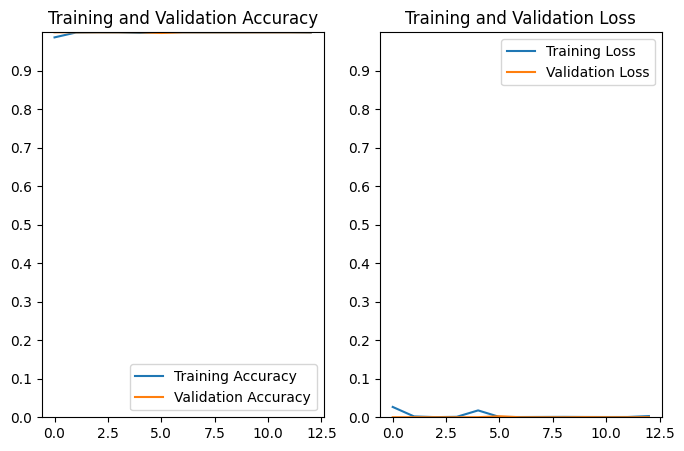

In [82]:
acc = historyd.history['accuracy']
val_acc = historyd.history['val_accuracy']

loss = historyd.history['loss']
val_loss = historyd.history['val_loss']

epochs_range = range(13)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [33]:
ypreddataset = modeld.predict(xtestvr)
#print(ypreddataset)
ypreddsbin = np.where(ypreddataset > 0.5,1,0)
#print(ypreddsbin)


ba = balanced_accuracy_score(ytestlabels,ypreddsbin)
print(ba)

34/34 [==============================] - 0s 2ms/step
1.0


## 2 CNNs, one for each dataset

In [34]:
def separate(x,y,labels):
  index0 = np.where(np.array(labels)==0)
  index1 = np.where(np.array(labels)==1)
  x0=x[index0]
  y0=y[index0]
  x1=x[index1]
  y1=y[index1]
  return x0,y0,x1,y1

In [35]:
septrain = separate(xtrainvr,ytrainb,ytrainlabels)
sepval = separate(xtestvr,ytestv,ytestlabels)
x0train = septrain[0]
y0train = septrain[1]
x1train = septrain[2]
y1train = septrain[3]
x0val = sepval[0]
y0val = sepval[1]
x1val = sepval[2]
y1val = sepval[3]


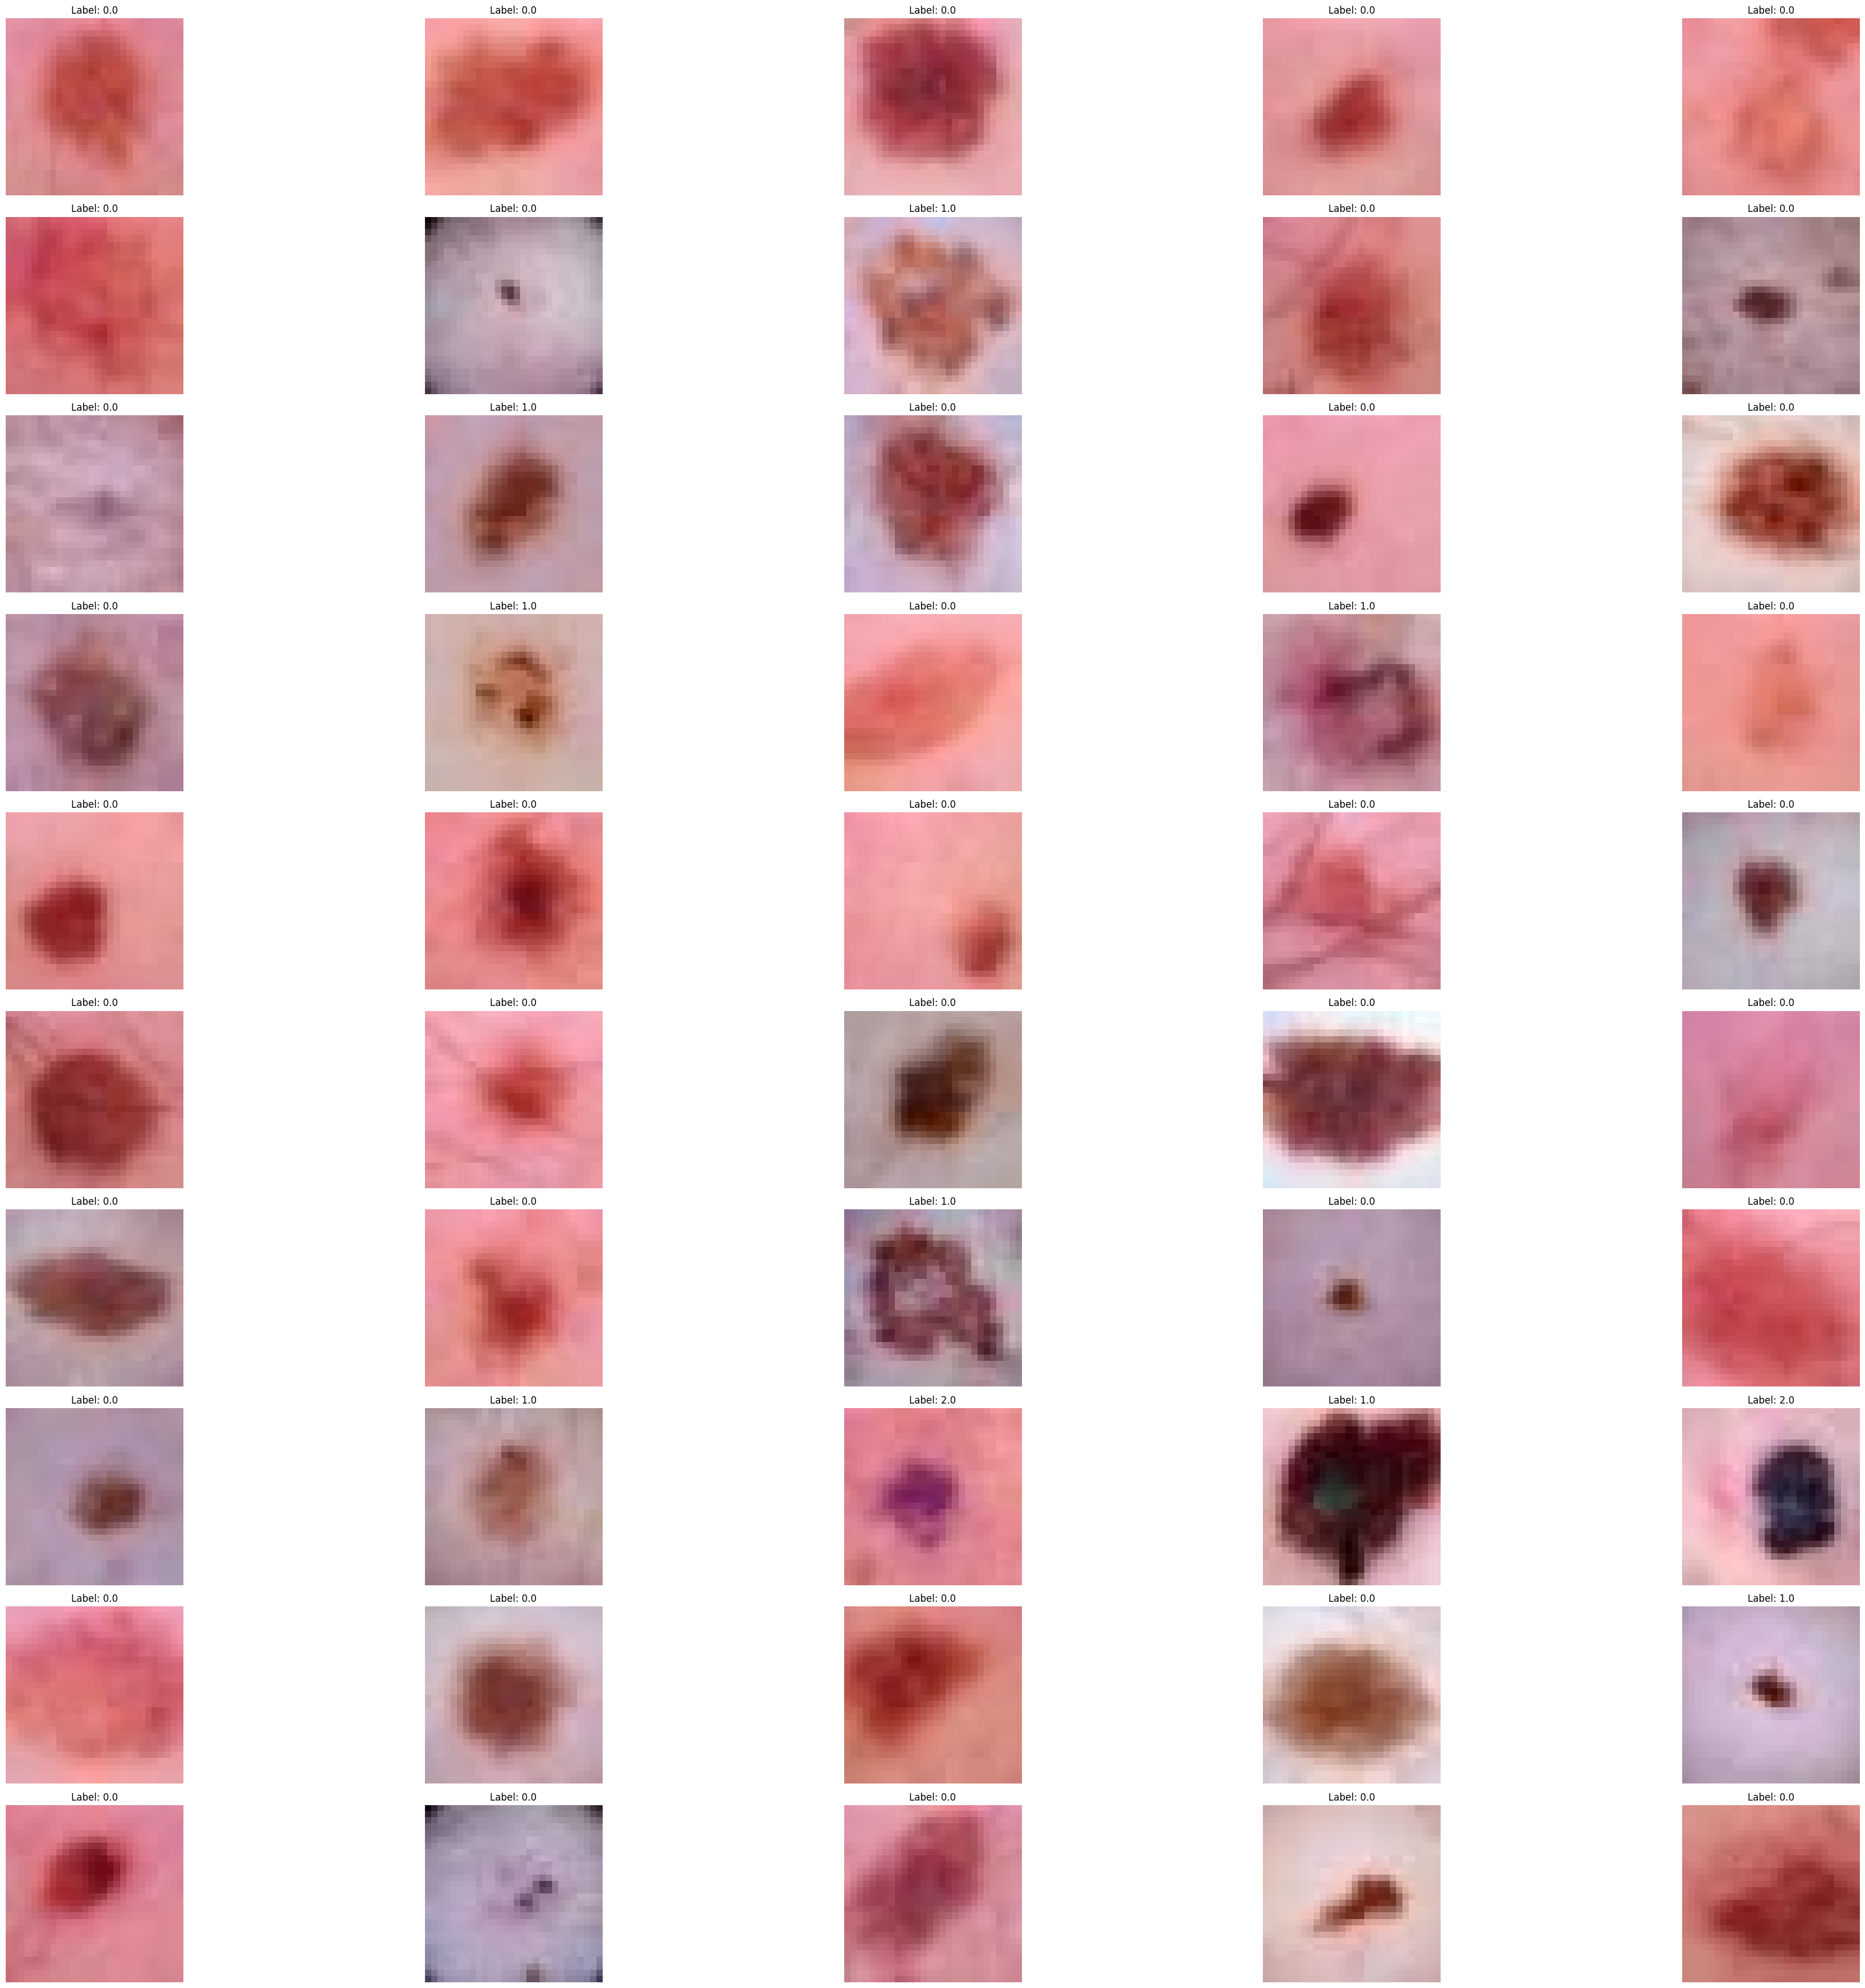

In [36]:
# visualize from dataset 0 to make sure that they're well separated

# visualize the data

num_images = 50
index = np.random.choice(len(x0train), 50, replace=False)

fig, axes = plt.subplots(10, 5, figsize=(40, 35))

for i, ax in enumerate(axes.flat):
    if i < len(x0train):
        ax.imshow(x0train[i])
        ax.set_title(f"Label: {y0train[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


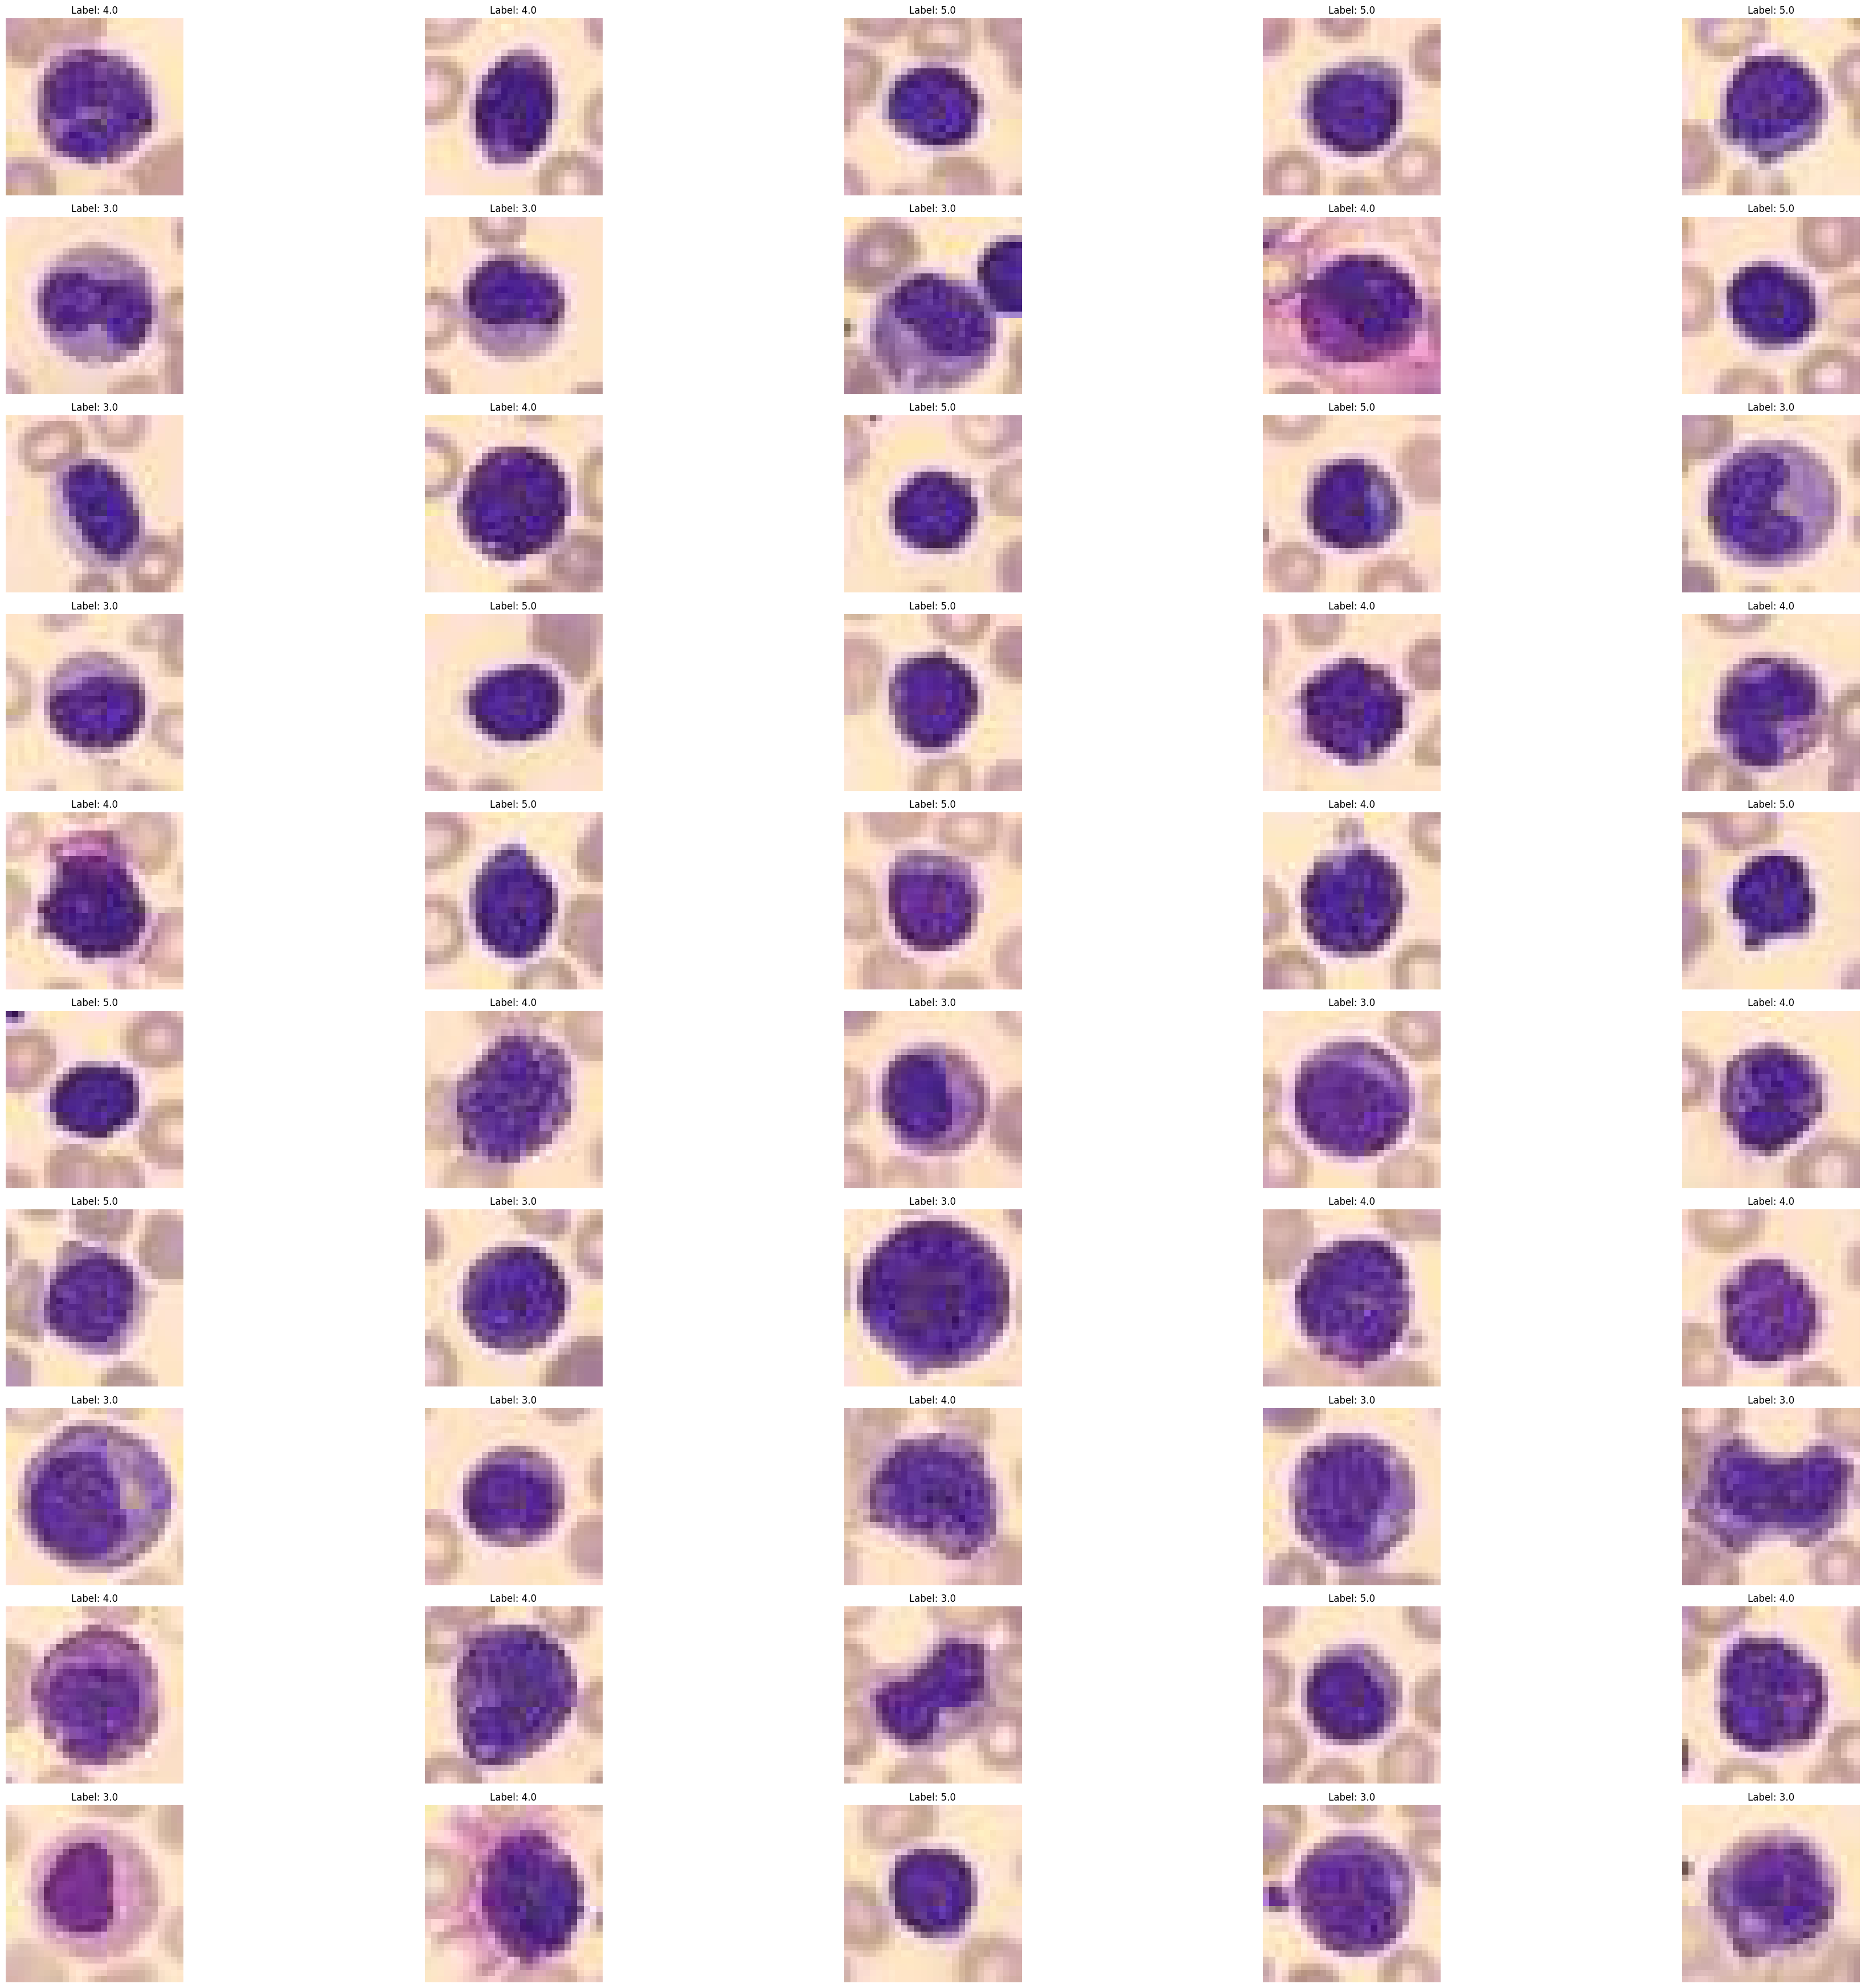

In [37]:
# visualize from dataset 1 to make sure that they're well separated

# visualize the data

num_images = 50
index = np.random.choice(len(x1train), 50, replace=False)

fig, axes = plt.subplots(10, 5, figsize=(40, 35))

for i, ax in enumerate(axes.flat):
    if i < len(x1train):
        ax.imshow(x1train[i])
        ax.set_title(f"Label: {y1train[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [38]:
# train model only with data set 0 to predict class label

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])



In [63]:
models0 = Sequential()
models0.add(data_augmentation)
models0.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
models0.add(layers.MaxPooling2D((2, 2),padding='same'))
#models0.add(layers.Dropout(0.2))
models0.add(layers.BatchNormalization())
models0.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
models0.add(layers.MaxPooling2D((2, 2),padding='same'))
#models0.add(layers.Dropout(0.2))
models0.add(layers.BatchNormalization())
models0.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
models0.add(layers.MaxPooling2D((2, 2),padding='same'))
models0.add(layers.Dropout(0.2))

In [64]:
models0.add(layers.Flatten())
models0.add(layers.Dense(128, activation='relu'))
models0.add(layers.Dropout(0.4))
models0.add(layers.Dense(3, activation='softmax')) #changed to softmax due to multiclass

In [65]:
y0trainc = tf.keras.utils.to_categorical(y0train, 3)
y0valc = tf.keras.utils.to_categorical(y0val, 3)

In [66]:
models0.reset_metrics()
models0.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights=True)

historys0 = models0.fit(x0train, y0trainc, epochs=150, callbacks=[stop],
                          validation_data=(x0val,y0valc))

Epoch 1/150
450/450 [==============================] - 5s 7ms/step - loss: 0.5202 - accuracy: 0.7774 - true_positives_3: 10677.0000 - true_negatives_3: 26231.0000 - false_negatives_3: 3723.0000 - false_positives_3: 2569.0000 - val_loss: 0.8576 - val_accuracy: 0.5421 - val_true_positives_3: 337.0000 - val_true_negatives_3: 1036.0000 - val_false_negatives_3: 316.0000 - val_false_positives_3: 270.0000
Epoch 2/150
450/450 [==============================] - 3s 7ms/step - loss: 0.4053 - accuracy: 0.8249 - true_positives_3: 11623.0000 - true_negatives_3: 26608.0000 - false_negatives_3: 2777.0000 - false_positives_3: 2192.0000 - val_loss: 0.4640 - val_accuracy: 0.7795 - val_true_positives_3: 488.0000 - val_true_negatives_3: 1182.0000 - val_false_negatives_3: 165.0000 - val_false_positives_3: 124.0000
Epoch 3/150
450/450 [==============================] - 3s 7ms/step - loss: 0.3786 - accuracy: 0.8376 - true_positives_3: 11822.0000 - true_negatives_3: 26730.0000 - false_negatives_3: 2578.0000 - 

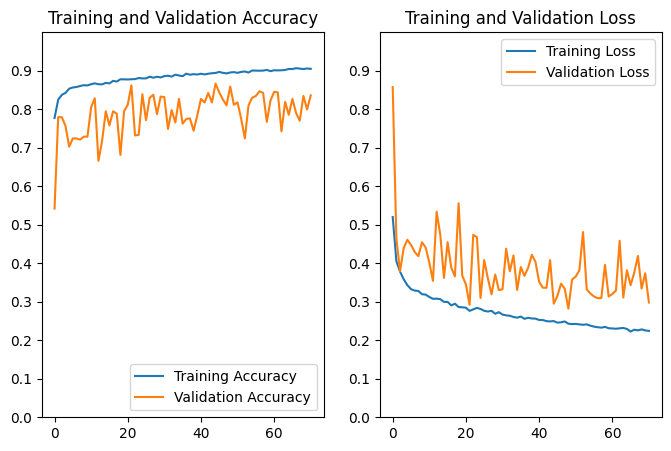

In [81]:
acc = historys0.history['accuracy']
val_acc = historys0.history['val_accuracy']

loss = historys0.history['loss']
val_loss = historys0.history['val_loss']

epochs_range = range(71)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [67]:
ypreds0 = models0.predict(x0val)
#print(ypreds0)

ypredlabels0 = [np.argmax(i) for i in ypreds0]
#print(ypredlabels0)

from collections import Counter

# Count the occurrences of each number
number_counts = Counter(ypredlabels0)

# Print the counts
for number, count in number_counts.items():
    print(f"Number {number} occurs {count} times.")


ba = balanced_accuracy_score(y0val,ypredlabels0)
print(ba)

21/21 [==============================] - 0s 2ms/step
Number 1 occurs 163 times.
Number 0 occurs 478 times.
Number 2 occurs 12 times.
0.8379781547041333


In [45]:
#train model with dataset 1 to predict class labels 3-5

models1 = Sequential()
models1.add(data_augmentation)
models1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
models1.add(layers.MaxPooling2D((2, 2),padding='same'))
models1.add(layers.Dropout(0.2))
models1.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
models1.add(layers.MaxPooling2D((2, 2),padding='same'))
models1.add(layers.Dropout(0.2))
models1.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
models1.add(layers.MaxPooling2D((2, 2),padding='same'))
models1.add(layers.Dropout(0.2))
models1.add(layers.Flatten())
models1.add(layers.Dense(128, activation='relu'))
models1.add(layers.Dense(3, activation='softmax')) #changed to softmax due to multiclass


In [46]:
y1trainscaled = y1train-3
y1valscaled = y1val - 3
#print(y1trainscaled)
#print(y1valscaled)

In [47]:
y1trainc = tf.keras.utils.to_categorical(y1trainscaled, 3)
y1valc = tf.keras.utils.to_categorical(y1valscaled, 3)

In [48]:
number_counts = Counter(y1valscaled)
print(number_counts)

Counter({0.0: 223, 2.0: 96, 1.0: 91})


In [49]:
models1.reset_metrics()
models1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights=True)

historys1 = models1.fit(x1train, y1trainc, epochs=150, callbacks=[stop],
                          validation_data=(x1val,y1valc))

Epoch 1/150
450/450 [==============================] - 5s 8ms/step - loss: 1.0535 - accuracy: 0.4598 - true_positives_2: 388.0000 - true_negatives_2: 28728.0000 - false_negatives_2: 14012.0000 - false_positives_2: 72.0000 - val_loss: 1.0246 - val_accuracy: 0.3634 - val_true_positives_2: 75.0000 - val_true_negatives_2: 802.0000 - val_false_negatives_2: 335.0000 - val_false_positives_2: 18.0000
Epoch 2/150
450/450 [==============================] - 3s 6ms/step - loss: 0.7976 - accuracy: 0.6049 - true_positives_2: 5968.0000 - true_negatives_2: 26297.0000 - false_negatives_2: 8432.0000 - false_positives_2: 2503.0000 - val_loss: 0.7459 - val_accuracy: 0.5463 - val_true_positives_2: 200.0000 - val_true_negatives_2: 676.0000 - val_false_negatives_2: 210.0000 - val_false_positives_2: 144.0000
Epoch 3/150
450/450 [==============================] - 3s 8ms/step - loss: 0.6834 - accuracy: 0.6736 - true_positives_2: 8547.0000 - true_negatives_2: 25466.0000 - false_negatives_2: 5853.0000 - false_pos

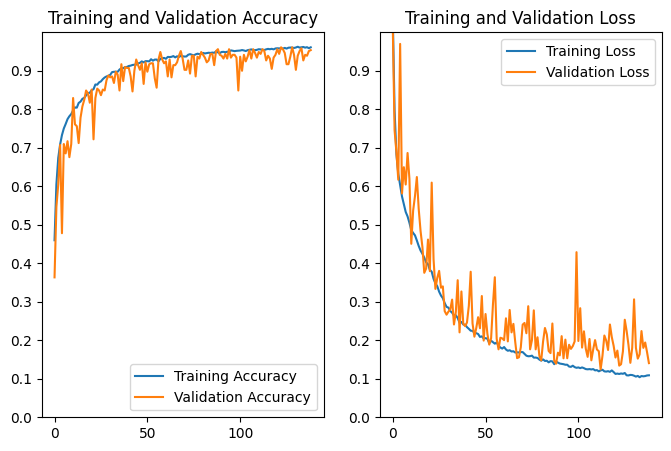

In [80]:
acc = historys1.history['accuracy']
val_acc = historys1.history['val_accuracy']

loss = historys1.history['loss']
val_loss = historys1.history['val_loss']

epochs_range = range(139)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.show()

In [51]:
number_counts = Counter(y1val)

# Print the counts
for number, count in number_counts.items():
    print(f"Number {number} occurs {count} times.")

Number 4.0 occurs 91 times.
Number 5.0 occurs 96 times.
Number 3.0 occurs 223 times.


In [52]:
ypreds1 = models1.predict(x1val)
#print(ypreds1)

ypredlabels1 = [np.argmax(i) for i in ypreds1]
#print(ypredlabels1)

# Count the occurrences of each number
number_counts = Counter(ypredlabels1)

# Print the counts
for number, count in number_counts.items():
    print(f"Number {number} occurs {count} times.")

ypredlabels1 = np.array(ypredlabels1)+3

ba = balanced_accuracy_score(y1val,ypredlabels1)
print(ba)

13/13 [==============================] - 0s 2ms/step
Number 1 occurs 98 times.
Number 2 occurs 91 times.
Number 0 occurs 221 times.
0.9542420552790508


### Hierarchical function (chosen model)

In [68]:
from tensorflow.python.ops.gen_math_ops import arg_max
def hierarchymodel(xtest):
  predictions = []
  for i in xtest:
    output1 = modeld.predict(np.array([i,]), verbose=0)
    if output1 > 0.5:
      finaloutput = models1.predict(np.array([i,]), verbose=0)
      arg = np.argmax(finaloutput)
      predictions.append(arg+3)
    else:
      finaloutput = models0.predict(np.array([i,]), verbose=0)
      arg = np.argmax(finaloutput)
      predictions.append(arg)
  return predictions

In [69]:
predshier = hierarchymodel(xtestvr)

In [70]:
print(predshier)

[1, 4, 4, 4, 0, 0, 5, 0, 3, 0, 1, 3, 0, 0, 1, 0, 3, 4, 5, 0, 0, 1, 3, 0, 0, 1, 1, 0, 3, 4, 0, 0, 3, 3, 3, 1, 5, 0, 3, 4, 1, 0, 3, 0, 4, 5, 1, 1, 1, 3, 0, 4, 3, 3, 1, 3, 0, 1, 4, 0, 3, 0, 0, 0, 3, 5, 0, 1, 3, 0, 3, 1, 0, 4, 3, 0, 4, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 4, 5, 5, 0, 0, 0, 5, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 4, 2, 3, 3, 0, 0, 0, 0, 4, 5, 0, 4, 4, 0, 0, 0, 3, 1, 0, 1, 1, 3, 1, 3, 3, 4, 3, 3, 1, 0, 0, 3, 5, 0, 0, 3, 3, 1, 0, 0, 4, 0, 3, 3, 3, 0, 1, 3, 0, 0, 0, 0, 3, 4, 0, 3, 1, 4, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 5, 5, 0, 1, 0, 3, 5, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 3, 2, 1, 0, 0, 2, 0, 5, 0, 1, 4, 0, 1, 4, 4, 0, 0, 1, 1, 1, 0, 4, 5, 0, 0, 3, 0, 1, 3, 3, 5, 0, 0, 0, 3, 0, 5, 0, 0, 0, 0, 3, 3, 1, 0, 0, 3, 3, 0, 0, 0, 0, 1, 1, 3, 0, 3, 0, 4, 3, 0, 1, 0, 0, 0, 4, 3, 5, 1, 0, 5, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 5, 5, 4, 0, 0, 5, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 3, 4, 0, 0, 5, 0, 0, 3, 0, 3, 1, 0, 3, 5, 

In [71]:
ba = balanced_accuracy_score(ytestv,predshier)
print(ba)

0.896110104991592


In [72]:
confmat = confusion_matrix(ytestv,predshier)

recall_per_class = np.diag(confmat) / np.sum(confmat, axis=1)
print(recall_per_class)
print((recall_per_class[0]+recall_per_class[1])/2)

[0.82562278 0.83116883 0.85714286 0.96860987 0.96703297 0.92708333]
0.8283958034847715


In [73]:
ypredfin = hierarchymodel(xtestr)

In [77]:
arrypredfin = np.array(ypredfin)
print(ypredfin)

[4, 3, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 3, 4, 0, 3, 0, 4, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 4, 0, 0, 0, 4, 0, 3, 0, 3, 1, 3, 1, 0, 0, 0, 5, 1, 1, 1, 3, 4, 3, 3, 0, 4, 0, 0, 3, 0, 0, 4, 0, 0, 4, 1, 3, 0, 0, 0, 1, 4, 0, 4, 0, 0, 0, 1, 0, 0, 5, 3, 1, 4, 5, 0, 0, 0, 5, 3, 0, 1, 0, 0, 1, 5, 1, 1, 1, 4, 3, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 4, 3, 5, 3, 3, 3, 0, 0, 4, 4, 0, 0, 4, 0, 0, 1, 3, 0, 3, 0, 1, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 1, 0, 4, 0, 0, 4, 0, 1, 1, 3, 0, 0, 3, 0, 0, 0, 3, 1, 0, 4, 3, 3, 0, 3, 0, 0, 0, 0, 1, 5, 4, 0, 0, 0, 0, 1, 0, 1, 0, 3, 5, 1, 5, 0, 3, 0, 1, 0, 0, 5, 0, 0, 3, 0, 4, 0, 3, 0, 4, 0, 0, 0, 1, 3, 1, 5, 1, 5, 5, 0, 3, 3, 0, 0, 0, 1, 3, 3, 1, 3, 0, 1, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 3, 3, 0, 4, 0, 1, 3, 5, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 1, 2, 0, 3, 3, 0, 2, 1, 0, 1, 0, 0, 0, 0, 3, 5, 4, 0, 0, 0, 4, 1, 0, 3, 0, 4, 3, 3, 0, 0, 1, 3, 0, 5, 3, 0, 4, 0, 5, 0, 0, 4, 1, 0, 0, 5, 0, 1, 4, 1, 4, 1, 0, 0, 5, 0, 5, 5, 4, 4, 5, 3, 0, 1, 0, 0, 0, 0, 0, 4, 0, 4, 3, 3, 0, 3, 4, 4, 3, 4, 0, 3, 4, 

In [78]:
print(xtestr.shape)
print(arrypredfin.shape)

(2658, 28, 28, 3)
(2658,)


In [79]:
np.save('ypredfin.npy',arrypredfin)

## Multi-input CNN that takes images and dataset label

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [59]:
input0 = keras.Input(shape=(28,28,3))
otherinput = keras.Input(shape=(1,))
x = Conv2D(32, (3, 3))(input0)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3, 3))(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
concx = tf.keras.layers.Concatenate(axis=1)([x,otherinput])
x = Dense(128)(concx)
#x = Dropout(0.4,seed=42)(x)
x = Dense(6, activation='softmax')(x)
modelfinal = Model(inputs=[input0,otherinput],outputs=x)



In [60]:
modelfinal.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 26, 26, 32)           896       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 26, 26, 32)           0         ['conv2d_12[0][0]']           
                                                                                                  
 dropout_11 (Dropout)        (None, 26, 26, 32)           0         ['activation[0][0]']          
                                                                                              

In [61]:
modelfinal.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

stop=tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights=True)

modelfinal.fit(x=[xtrainvr,np.array(ytrainlabels)], y=ytrainvc, epochs=100, callbacks=[stop])

Epoch 1/100
900/900 [==============================] - 6s 5ms/step - loss: 0.6683 - accuracy: 0.7016
Epoch 2/100
900/900 [==============================] - 5s 5ms/step - loss: 0.4444 - accuracy: 0.8162
Epoch 3/100
900/900 [==============================] - 4s 5ms/step - loss: 0.3625 - accuracy: 0.8497
Epoch 4/100
900/900 [==============================] - 5s 5ms/step - loss: 0.3281 - accuracy: 0.8639
Epoch 5/100
900/900 [==============================] - 5s 5ms/step - loss: 0.2975 - accuracy: 0.8758
Epoch 6/100
900/900 [==============================] - 4s 5ms/step - loss: 0.2817 - accuracy: 0.8820
Epoch 7/100
900/900 [==============================] - 5s 5ms/step - loss: 0.2568 - accuracy: 0.8911
Epoch 8/100
900/900 [==============================] - 4s 5ms/step - loss: 0.2481 - accuracy: 0.8967
Epoch 9/100
900/900 [==============================] - 4s 5ms/step - loss: 0.2358 - accuracy: 0.9017
Epoch 10/100
900/900 [==============================] - 5s 6ms/step - loss: 0.2301 - accura

In [62]:
ypredf = modelfinal.predict([xtestvr,np.array(ytestlabels)])
#print(ypredf)

ypredlabelsf = [np.argmax(i) for i in ypredf]
#print(ypredlabelsf)

from collections import Counter

# Count the occurrences of each number
number_counts = Counter(ypredlabelsf)

# Print the counts
for number, count in number_counts.items():
    print(f"Number {number} occurs {count} times.")


ba = balanced_accuracy_score(ytestv,ypredlabelsf)
print(ba)

34/34 [==============================] - 0s 4ms/step
Number 1 occurs 254 times.
Number 4 occurs 86 times.
Number 3 occurs 237 times.
Number 0 occurs 390 times.
Number 5 occurs 87 times.
Number 2 occurs 9 times.
0.8095938976574778
